## ME6 Linear Regression with Gradient Descent

Write your name and your collaborators if any. 
- Gabriel Suarez
- Sophia Luehmann

### Set up 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Read and run each cell of the given examples: (1) synthetic dataset (2) crime dataset

- Understand the results. In particular, see how feature normalization affects on ridges regression and how the model performance changes when varying alpha parameter values are used in both ridge regression and Lasso regression. 

### Linear models for regression

- Visit sklearn web site:
   - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


- Please also check model evaluation metrics for regression:

    - https://scikit-learn.org/stable/modules/model_evaluation.html

    - ME5 Simple Linear Regression shows evaluation metrics for regression in detail. 

### Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

### Dataset 1: Synthetic random data points

- One single attribute in X

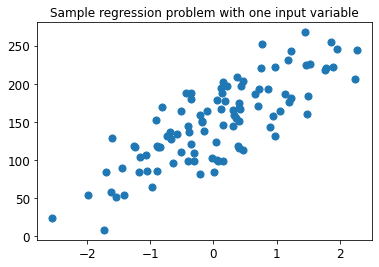

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                             n_informative=1, bias = 150.0,
                             noise = 30, random_state=0)

plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

#### Linear regression on synthetic dataset


In [3]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

#### Linear regression model coefficient and intercept values \& performance metrics

In [4]:
from sklearn import metrics

print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('linear model coeff (w): {}'.format(linreg.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print(X_R1.shape, '\n', y_R1.shape)

linear model intercept (b): 148.446
linear model coeff (w): [45.70870465]
R-squared score (training): 0.679
R-squared score (test): 0.492
RMSE: 33.203
(100, 1) 
 (100,)


### Linear regression cost optimization

First, we add 1 for x0 value to each data tuple

In [5]:
X_b = np.c_[np.ones((100, 1)), X_R1]  # add x0 = 1 to each data tuple
y_b = y_R1.reshape(100, 1)

print(X_b.shape, '\n', y_b.shape)

(100, 2) 
 (100, 1)


#### Obtain the exact theta vector using close form

<img src="images/cf.png" style="width: 200px;">

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_R1)
theta_best

array([147.55745452,  43.08728116])

#### Obtain theta using Gradient Descent

In [7]:
# learning rate
alpha = 0.01

# number of iterations
n_iteration = 100

# the number of data points
n = 100

# random initialization to theta. 
# Return samples (2 values for theta0 for x0 and theta1 for x1) 
# from the “standard normal” distribution.
theta = np.random.randn(2, 1)

print('initial theta: \n', theta, theta.shape)

initial theta: 
 [[ 0.49671415]
 [-0.1382643 ]] (2, 1)


In [8]:
# the process of gradient descent
for iteration in range(n_iteration):
    gradient = (1/n) * X_b.T.dot(X_b.dot(theta) - y_b)
    theta = theta - alpha*gradient
    
print('best theta: \n', theta)

# we will need to tune with learning rate alpha and # of iterations
# to find out the optimal theta value

best theta: 
 [[94.57899586]
 [30.76669701]]


#### plot the linear model with scatter plot

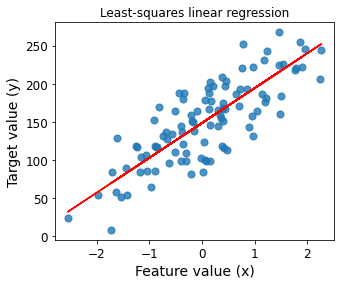

In [9]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Dataset 2: crime dataset

In [10]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    # na_values='?'
    crime = pd.read_csv('./data/CommViolPredUnnormalizedData.csv', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    
    crime = crime.iloc[:, columns_to_keep]
    crime = crime.dropna()
    
    X_crime = crime.iloc[:, 0:88]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

In [11]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

#print(X_crime.head())
#print(y_crime.head())

FileNotFoundError: [Errno 2] No such file or directory: './data/CommViolPredUnnormalizedData.csv'

In [ ]:
print(X_crime.shape, '\n', y_crime.shape)

In [ ]:
X = np.c_[np.ones((1994, 1)), X_crime]
X.shape
# now there are 89 attributes including x0 and 88 data attributes

In [ ]:
y = y_crime.values.reshape(1994, 1)

print(y.shape,'\n', y)

In [ ]:
eta = 0.05  # learning rate
n_iterations = 10 # number of total iterations
n = 1994 # the number of data

theta = np.random.randn(89, 1)  # random initialization

print(theta.shape, '\n', theta)

In [ ]:
for iteration in range(n_iterations):
    gradient = (1/n) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradient
    
print(theta)

In [ ]:
X_new = X_crime.iloc[:1, 0:88]
X_new_b = np.c_[np.ones((1, 1)), X_new] 
y_new = y_crime[0]

y_predict = X_new_b.dot(theta)

print(y_new, '\n', y_predict)

#### Linear regression on crime dataset (without regularization)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

#### Ridge regression (regularized regression)

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

#### Ridge regression with feature normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

#### Ridge regression with regularization parameter: alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### Lasso regression

In [1]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

NameError: name 'train_test_split' is not defined

#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

## Part 1: Linear Regression Modeling on Breast Cancer dataset

a. Obtain the exact theta vector using closed form.

b. Obtain the optimal theta vector using Gradient Descent.

c. Apply the following regression model on breast cancer dataset:

    (1) Linear regression without regularization

    (2) Ridge regression 

    (3) Ridge regression with feature normalization

    (4) Ridge regression with regularization parameter: alpha

    (5) Lasso regression

    (6) Lasso regression with regularization parameter: alpha

### Dataloading: Breast cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(cancer.feature_names)
print(y_cancer)
print(X_cancer.shape, '\t', y_cancer.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

#### A. (Closed form)



In [11]:
import numpy as np
X = np.c_[np.ones((569,1)),X_cancer]
y = y_cancer.reshape(569,1)
print(X.shape, '\n', y.shape)
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_cancer)
print(theta_best)

(569, 31) 
 (569, 1)
[ 3.02181174e+00  2.17772056e-01 -4.54546867e-03 -2.37398610e-02
 -3.17834750e-04 -8.46891370e-02  4.22203525e+00 -1.39799728e+00
 -2.14183303e+00 -1.02709200e-01 -3.32616097e-02 -4.34955932e-01
  6.75847233e-03  2.25202577e-02  9.23217886e-04 -1.58543207e+01
 -6.49034090e-02  3.56546799e+00 -1.05679513e+01 -1.69734069e+00
  7.14644016e+00 -1.95183121e-01 -7.15937520e-03  2.43505057e-03
  1.01122332e-03 -5.42856861e-01 -6.71582941e-02 -3.81191215e-01
 -4.64309895e-01 -5.56787546e-01 -4.30348309e+00]


#### B. (Gradient descent). 

In [12]:
# learning rate
alpha = 0.05

# number of iterations
n_iteration = 10

# the number of data points
n = 569

# random initialization to theta. 
# Return samples (2 values for theta0 for x0 and theta1 for x1) 
# from the “standard normal” distribution.
theta = np.random.randn(31, 1)

print('initial theta: \n', theta, theta.shape)

# the process of gradient descent
for iteration in range(n_iteration):
    gradient = (1/n) * X.T.dot(X.dot(theta) - y)
    theta = theta - alpha*gradient
    
print('best theta: \n', theta)

initial theta: 
 [[ 0.69498454]
 [-0.02901579]
 [-1.13287659]
 [ 1.11382797]
 [ 0.3046606 ]
 [-0.34745475]
 [ 0.79385583]
 [-0.69159662]
 [ 0.2675379 ]
 [ 1.14966732]
 [-1.65484686]
 [ 0.330822  ]
 [-1.0185414 ]
 [-0.2172261 ]
 [-0.91823095]
 [ 0.01286777]
 [ 0.35248182]
 [ 1.14373749]
 [-2.06227559]
 [-0.57421253]
 [-0.85161586]
 [ 2.00873979]
 [ 0.02415919]
 [ 0.7622083 ]
 [ 0.98142413]
 [ 1.04625522]
 [-0.78238314]
 [-0.55771205]
 [ 0.62904073]
 [-1.0579396 ]
 [-0.96892691]] (31, 1)
best theta: 
 [[1.15726633e+46]
 [1.86999010e+47]
 [2.33354403e+47]
 [1.22644362e+48]
 [9.96679048e+48]
 [1.13460587e+45]
 [1.39445554e+45]
 [1.40598358e+45]
 [7.86753320e+44]
 [2.12903965e+45]
 [7.14557904e+44]
 [6.13469044e+45]
 [1.37833400e+46]
 [4.34803084e+46]
 [7.23692284e+47]
 [7.77686455e+43]
 [3.20378062e+44]
 [4.10157371e+44]
 [1.51685682e+44]
 [2.32058697e+44]
 [4.35230488e+43]
 [2.21273622e+47]
 [3.11242955e+47]
 [1.46940864e+48]
 [1.41172412e+49]
 [1.56107647e+45]
 [3.40860027e+45]
 [3.92848

(1) Linear regression without regularization

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Cancer dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

Cancer dataset
R-squared score (training): 0.782
R-squared score (test): 0.729
RMSE: 0.251
linear model intercept: 3.264323682949687
linear model coeff:
[ 1.95664033e-01 -1.24998359e-02 -1.83925145e-02 -3.08554299e-04
 -6.58769659e-01  4.67316114e+00 -1.41047944e+00 -1.79519061e+00
 -1.02466251e+00 -8.16682870e-01 -6.95506836e-01 -2.65194673e-02
  6.52894932e-02  3.22253562e-04 -1.16323309e+01 -4.43943865e-02
  3.04134165e+00 -8.31729413e+00 -2.44644000e+00  1.96844051e+01
 -1.78964757e-01 -2.00410588e-04 -4.02896117e-03  1.17548563e-03
 -4.04988322e-01 -1.15267671e-01 -4.11583121e-01 -9.11239745e-01
 -1.12925131e-01 -5.02459596e+00]
Number of non-zero features: 30


(2) Ridge regression 

In [18]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

linridge = Ridge(alpha = 20.0).fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.718
R-squared score (test): 0.701
RMSE: 0.251
ridge regression linear model intercept: 2.8876581523658107
ridge regression linear model coeff:
[ 8.95459514e-02  4.96576604e-03 -6.53071472e-03 -9.38715208e-06
 -1.70744323e-02 -2.48627421e-02 -4.93503540e-02 -2.77020642e-02
 -3.06915402e-02 -4.70309146e-03 -4.64609813e-02 -1.10244435e-02
 -1.66584359e-02 -3.44749865e-04 -2.54152959e-03  2.62285611e-04
 -1.16547194e-03 -2.54907417e-03 -5.31339660e-03 -7.79367812e-05
 -1.60523115e-01 -1.55701325e-02 -6.49252297e-03  1.01356127e-03
 -3.15652552e-02 -8.47221763e-02 -1.40803334e-01 -5.21846681e-02
 -6.76483639e-02 -1.53442711e-02]
Number of non-zero features: 30


(3) Ridge regression with feature normalization

In [19]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
R-squared score (training): 0.698
R-squared score (test): 0.696
RMSE: 0.251
ridge regression linear model intercept: 1.4075287620294374
ridge regression linear model coeff:
[-0.15953124 -0.14083798 -0.15623107 -0.11422388 -0.0739519  -0.07506947
 -0.11895532 -0.191061   -0.07479776  0.06879125 -0.07719428 -0.00264562
 -0.05536349 -0.03226534  0.02846709  0.04759806  0.03104476 -0.02518334
 -0.00139326  0.04768871 -0.20126066 -0.16533176 -0.18362235 -0.1237563
 -0.13628769 -0.11408258 -0.13774801 -0.27762586 -0.13141221 -0.05403194]
Number of non-zero features: 30


(4) Ridge regression with regularization parameter: alpha

In [20]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 8, r-squared training: 0.78, r-squared test: 0.73

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.75, r-squared test: 0.73

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.72, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.70, r-squared test: 0.70

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.65, r-squared test: 0.65

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.57, r-squared test: 0.58

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.16, r-squared test: 0.16



(5) Lasso regression

In [22]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=.001, max_iter = 10000).fit(X_train_scaled, y_train)

print('Cancer dataset')

print('R-squared score (training): {:.10f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.10f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.10f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n')
print(list(map('{:.10f}'.format, linlasso.coef_)))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_cancer), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.10f}'.format(e[0], e[1]))

Cancer dataset
R-squared score (training): 0.7372847248
R-squared score (test): 0.7212912343

RMSE: 0.2513430205
lasso regression linear model intercept: 1.524539277168761
lasso regression linear model coeff:

['-0.0000000000', '-0.2683460905', '-0.0000000000', '0.0000000000', '-0.0000000000', '0.0000000000', '-0.0000000000', '-0.2715180087', '-0.0131858633', '0.2051547104', '-0.2673298864', '-0.0484496692', '-0.0000000000', '0.0000000000', '-0.0000000000', '0.2062584619', '0.0000000000', '0.0000000000', '-0.0589168966', '0.0000000000', '-0.7263446337', '-0.1359540602', '-0.0000000000', '0.0000000000', '-0.2358899109', '-0.0000000000', '-0.1074063355', '-0.7209760579', '-0.3190389618', '-0.0765210315']
Non-zero features: 15
Features with non-zero weight (sorted by absolute magnitude):
	[1.308e+01 1.571e+01 8.563e+01 5.200e+02 1.075e-01 1.270e-01 4.568e-02
 3.110e-02 1.967e-01 6.811e-02 1.852e-01 7.477e-01 1.383e+00 1.467e+01
 4.097e-03 1.898e-02 1.698e-02 6.490e-03 1.678e-02 2.425e-03 

(6) Lasso regression with regularization parameter: alpha

In [23]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, .05, 0.1]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.3f}\nFeatures kept: {}, r-squared training: {:.20f}, \
r-squared test: {:.20f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.001
Features kept: 15, r-squared training: 0.73728472479294526742, r-squared test: 0.72129123429883845731

Alpha = 0.002
Features kept: 11, r-squared training: 0.72818678110502288447, r-squared test: 0.72175250163222504085

Alpha = 0.003
Features kept: 8, r-squared training: 0.72182956475546522501, r-squared test: 0.72099239749172894243

Alpha = 0.004
Features kept: 7, r-squared training: 0.71710775245119351418, r-squared test: 0.71702652546457745775

Alpha = 0.005
Features kept: 7, r-squared training: 0.71120786980190486837, r-squared test: 0.71170992317093950685

Alpha = 0.010
Features kept: 5, r-squared training: 0.68971896127878729033, r-squared test: 0.68816772583744723057

Alpha = 0.050
Features kept: 1, r-squared training: 0.42307602344443973053, r-squared test: 0.42091192945536537451

Alpha = 0.100
Features kept: 0, r-squared training: 0.00000000000000000000, r-square

## Part 2

- Submit your summary to Canvas
- Provide a link to your Git repo of the assignment.

Summary of findings from modeling exercise: 

It is important to scale the data before performing Ridge Regression, as it is sensitive to the scale of the input features. As seen in this exercise, it is necessary to standardize the predictors before fitting the model since the penalties are a function of the size of the coefficients, which depends on the scale of the data.

When changing the alpha values in ridge regression, the lower the value is, the higher the r-squared value is. As the alpha value gets larger, the lower the r-squared value are but the difference between the r-squared values for testing and training set get smaller. 

When changing the alpha values in Lasso regression, the larger the alpha value, the less features are kept and the lower the r-squared score is. 